# Glider Guidance System 2 Data Visualization
Author: Matthew Learn (matt.learn@marine.rutgers.edu)<br><br>
Jupyter Notebook meant for visualizing Glider Guidance System 2 (GGS2) products.

## Parameter Selection
Here is a list of all parameters and what they do:
| Variable | Data Type | Valid Inputs/Format | Notes |
|---|---|---|---|
| MISSION_NAME | str | "mission" | Name of the mission configuration. |
| START_DATE | str | "YYYY-MM-DD", "today", "tomorrow", "yesterday", or `None` | Sample start date |
| END_DATE | str | "YYYY-MM-DD", "today", "tomorrow", "yesterday", or `None` | Sample end date |
| SW_COORD | tuple(float, float) | (-90 - 90, -180 - 180) | Southwest boundary coordinate |
| NE_COORD | tuple(float, float) | (-90 - 90, -180 - 180) | Northeast boundary coordinate |
| MAX_DEPTH | int | 0 - 1000 (recommended) | Maximum working depth (m) of glider model |
| CMEMS | bool | True - False | European Model |
| ESPC | bool | True - False | Navy Model |
| RTOFS_EAST | bool | True - False | NOAA model for US east coast |
| RTOFS_WEST | bool | True - False | NOAA model for US west coast |
| RTOFS_PARALLEL | bool | True - False | Experimental NOAA model for east coast |
| COMPUTE_OPTIMAL_PATH | bool | True - False | Compute the optimal path using an A* algorithm |
| WAYPOINTS | list(tuple) | [(lat1, lon1), ..., (latx, lonx)] | List of coordinates to pass into the A* algorithm. Minimum of 2 points are required |
| GLIDER_RAW_SPEED | float | 0.5 (recommended) | Raw speed of glider model |
| INDIVIDUAL_PLOTS | bool | True - False | Make plots of individual model products |
| SPEED_DIFFERENCE | bool | True - False | Make plots of the differences depth averaged speeds of each non-repeating pair of models |
| U_DIFFERENCE | bool | True - False | Make plots of the difference of the eastward depth averaged velocity component of each non-repeating pair of models |
| V_DIFFERENCE | bool | True - False | Make plots of the difference of the northward depth averaged velocity component of each non-repeating pair of models |
| MEAN_DIFFERENCES | bool | True - False | Plot the mean of the differences of each non-repeating pair of models |
| SIMPLE_MEAN | bool | True - False | Plot the simple mean of all selected model combinations |
| RMS_VERTICAL_DIFFERENCE | bool | True - False | Plot the root mean square vertical difference between all selected model combinations |
| PLOT_MAGNITUDES | bool | True - False | Make a plot of depth averaged current magnitude contours |
| PLOT_MAGNITUDE_THRESHOLDS | bool | True - False | Make a plot of depth averaged current magnitude threshold contours |
| VECTOR_TYPE | string | "quiver", "streamplot", None | Determines the vector type of the plot to show current direction |
| STREAMLINE_DENSITY | int | --- | Density of streamlines. Higher number = denser streamlines |
| QUIVER_DOWNSCALING | int | --- | Downsampling scalar for quiver plots. Higher number = Less quivers |
| SAVE_FIGURES | bool | True - False | Save figures locally in the GGS/figures directory |
| save_config | bool | True - False | Save current options as a JSON file |
| config_directory | str | "relative_path" | Directory that the config file will save to |
| load_config | bool | True - False | Load locally stored config file |
| config_name | str | "filename" | File name of the locally stored config file |

__WARNING__: Failure to adhere to variable formatting will result in unexpected errors.<br><br>
In the cell below, parameters may be selected. To run the GGS, click the __two triangles__ on the ribbon at the top of the page. For those using VS Code, it will be the `Run All` button.

## Config Generator
Please edit any parameters here!

In [1]:
# Mission Parameters
MISSION_NAME = "fastcmems_test"

# Subset Parameters
START_DATE = "tomorrow"
END_DATE = None
SW_COORD = (34, -74)
NE_COORD = (45, -50)
MAX_DEPTH = 1000

# Model Parameters
CMEMS = True
ESPC = True
RTOFS_EAST = True
RTOFS_WEST = False
RTOFS_PARALLEL = True

# Pathfinding Parameters
COMPUTE_OPTIMAL_PATH = False
WAYPOINTS = [(41.240, -70.958), (37.992, -71.248), (36.943, -66.862), (38.666, -62.978), (39.801, -60.653), (39.618, -55.87)]
GLIDER_RAW_SPEED = 0.37 # horizontal speed TODO: find out how A* uses this

# Plotting Parameters
INDIVIDUAL_PLOTS = True

SPEED_DIFFERENCE = True
U_DIFFERENCE = True
V_DIFFERENCE = True
MEAN_DIFFERENCE = False
SIMPLE_MEAN = False
RMS_VERTICAL_DIFFERENCE = True

PLOT_MAGNITUDES = True # used for both individual plots and simple mean plots
PLOT_MAGNITUDE_THRESHOLDS = True

VECTOR_TYPE = 'streamplot'
STREAMLINE_DENSITY = 5
QUIVER_DOWNSCALING = 6

SAVE_FIGURES = False

###################################################
# Config File Parameters
save_config = False
config_directory = "config"

## Load In Previous Config
Set `load_config` to `True` if loading in a config file that is already saved. Set `config_name` to the __file name without .json__ of the config file (case sensitive).

In [2]:
load_config = True
config_name = "small"

# **DO NOT EDIT ANYTHING BELOW THIS POINT!**

## Format Parameters and Run Script

In [3]:
%matplotlib inline

import json
import os

if not load_config:
    params = {
        "MISSION_NAME": MISSION_NAME,
        "SUBSET": {
            "TIME": {
                "START_DATE": START_DATE,
                "END_DATE": END_DATE,
            },
            "EXTENT": {
                "SW_POINT": SW_COORD,
                "NE_POINT": NE_COORD,
            },
            "MAX_DEPTH": MAX_DEPTH,
        },
        "MODELS": {
            "CMEMS": CMEMS,
            "ESPC": ESPC,
            "RTOFS_EAST": RTOFS_EAST,
            "RTOFS_WEST": RTOFS_WEST,
            "RTOFS_PARALLEL": RTOFS_PARALLEL,
        },
        "PATHFINDING": {
            "ENABLE": COMPUTE_OPTIMAL_PATH,
            "ALGORITHM": "A*",
            "HEURISTIC": None,
            "WAYPOINTS": WAYPOINTS,
            "GLIDER_RAW_SPEED": GLIDER_RAW_SPEED,
        },
        "PLOTTING": {
            "INDIVIDUAL_PLOTS": INDIVIDUAL_PLOTS,
            "COMPARISON_PLOTS": {
                "SIMPLE_DIFFERENCE": SPEED_DIFFERENCE,
                "U_DIFFERENCE": U_DIFFERENCE,
                "V_DIFFERENCE": V_DIFFERENCE,
                "MEAN_DIFFERENCE": MEAN_DIFFERENCE,
                "SIMPLE_MEAN": SIMPLE_MEAN,
                "RMS_VERTICAL_DIFFERENCE": RMS_VERTICAL_DIFFERENCE,
            },
            "PLOT_MAGNITUDES": PLOT_MAGNITUDES,
            "PLOT_MAGNITUDE_THRESHOLDS": PLOT_MAGNITUDE_THRESHOLDS,
            "PLOT_OPTIMAL_PATH": COMPUTE_OPTIMAL_PATH,
            "VECTORS": {
                "TYPE": VECTOR_TYPE,
                "STREAMLINE_DENSITY": STREAMLINE_DENSITY,
                "QUIVER_DOWNSCALING": QUIVER_DOWNSCALING,
            },
            "SAVE_FIGURES": SAVE_FIGURES,
        },
    }

    config_name = MISSION_NAME.lower().replace(" ", "_")
    config_path = f"{config_directory}/{config_name}.json"

    if save_config:
        os.makedirs(config_directory, exist_ok=True)
        with open(config_path, "w") as f:
            json.dump(params, f, indent=4)

Start time (UTC): 2025-03-11 03:29:30.086756+00:00

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~          
 ~~~~~/\\\\\\\\\\\\~~~~~~/\\\\\\\\\\\\~~~~~~/\\\\\\\\\\\~~~~~~~/\\\\\\\\\~~~~~         
  ~~~/\\\//////////~~~~~/\\\//////////~~~~~/\\\/////////\\\~~~/\\\///////\\\~~~        
   ~~/\\\~~~~~~~~~~~~~~~/\\\~~~~~~~~~~~~~~~\//\\\~~~~~~\///~~~\///~~~~~~\//\\\~~       
    ~\/\\\~~~~/\\\\\\\~~\/\\\~~~~/\\\\\\\~~~~\////\\\~~~~~~~~~~~~~~~~~~~~/\\\/~~~      
     ~\/\\\~~~\/////\\\~~\/\\\~~~\/////\\\~~~~~~~\////\\\~~~~~~~~~~~~~~/\\\//~~~~~     
      ~\/\\\~~~~~~~\/\\\~~\/\\\~~~~~~~\/\\\~~~~~~~~~~\////\\\~~~~~~~~/\\\//~~~~~~~~    
       ~\/\\\~~~~~~~\/\\\~~\/\\\~~~~~~~\/\\\~~~/\\\~~~~~~\//\\\~~~~~/\\\/~~~~~~~~~~~   
        ~\//\\\\\\\\\\\\/~~~\//\\\\\\\\\\\\/~~~\///\\\\\\\\\\\/~~~~~/\\\\\\\\\\\\\\\~  
         ~~\////////////~~~~~~\////////////~~~~~~~\///////////~~~~~~\///////////////~~ 
          ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

INFO - 2025-03-11T03:29:31Z - Selected dataset version: "202406"
INFO - 2025-03-11T03:29:31Z - Selected dataset part: "default"


Done.
End time (UTC): 2025-03-11 03:29:39.831972+00:00
Runtime: 0:00:09.221998

CMEMS: Queing calculations...
Start time (UTC): 2025-03-11 03:29:39.831972+00:00
Persisting...Done.
Computing...Done.
Processing Done.
End time (UTC): 2025-03-11 03:32:05.959609+00:00
Runtime: 0:02:26.127637

CMEMS: Creating streamline plot of depth averaged current magnitudes...
Start time (UTC): 2025-03-11 03:32:05.959609+00:00
Done.
End time (UTC): 2025-03-11 03:32:12.811248+00:00
Runtime: 0:00:06.851639

CMEMS: Creating streamline plot of depth averaged current magnitude thresholds...
Start time (UTC): 2025-03-11 03:32:12.811248+00:00
Done.
End time (UTC): 2025-03-11 03:32:18.945417+00:00
Runtime: 0:00:06.134169

Loading RTOFS data...
Start time (UTC): 2025-03-11 03:32:18.946924+00:00
Model source: RTOFS (East Coast)
Done.
End time (UTC): 2025-03-11 03:32:24.246906+00:00
Runtime: 0:00:05.299982

RTOFS (East Coast): Queing calculations...
Start time (UTC): 2025-03-11 03:32:24.246906+00:00
Persisting...Do

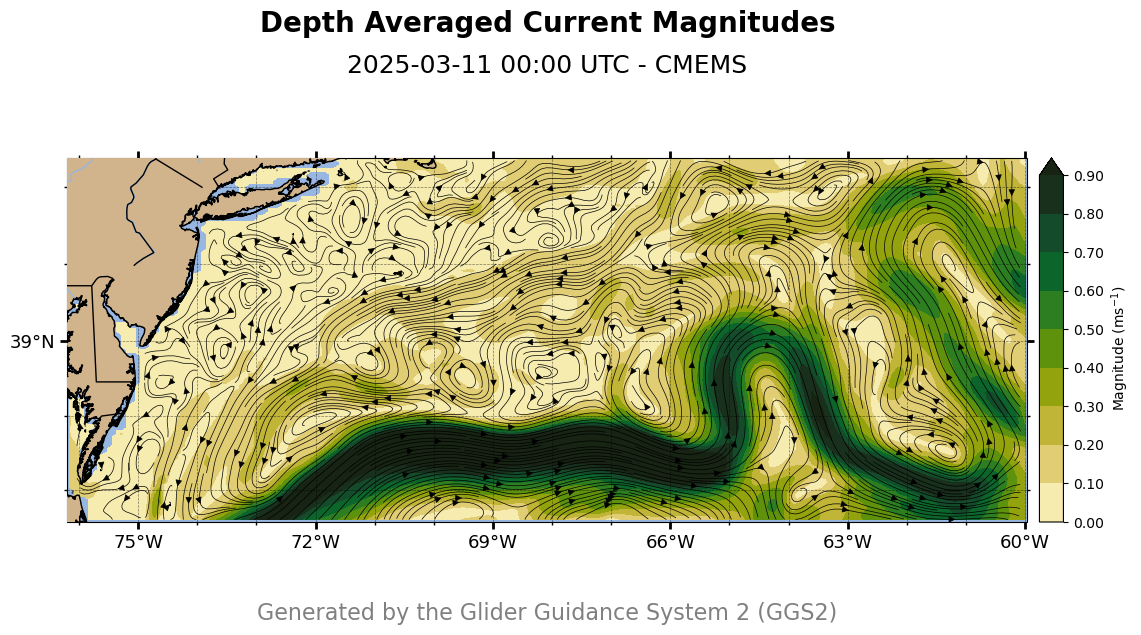

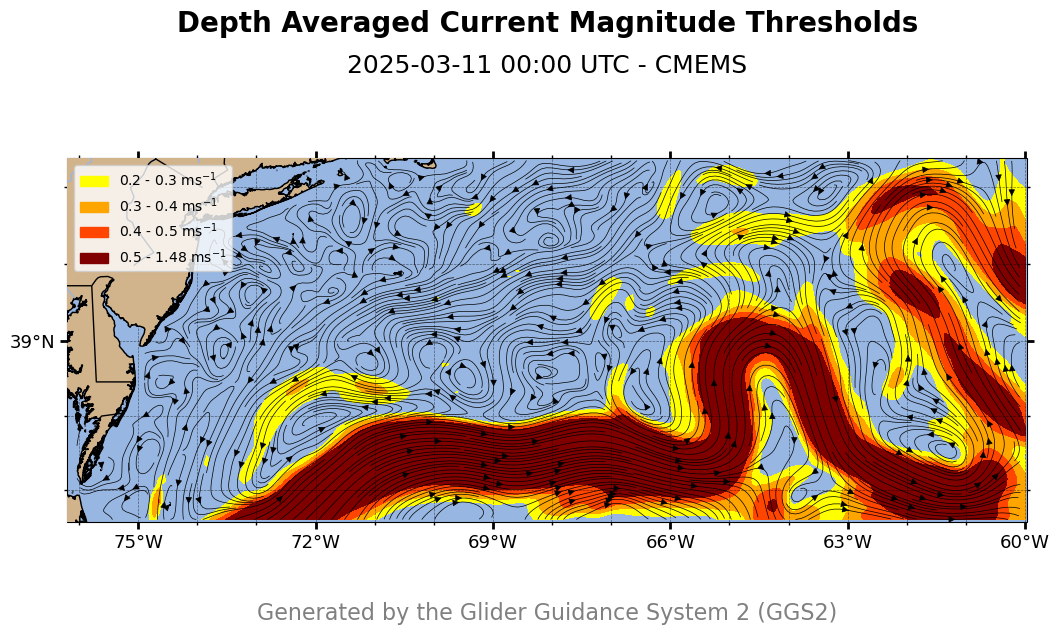

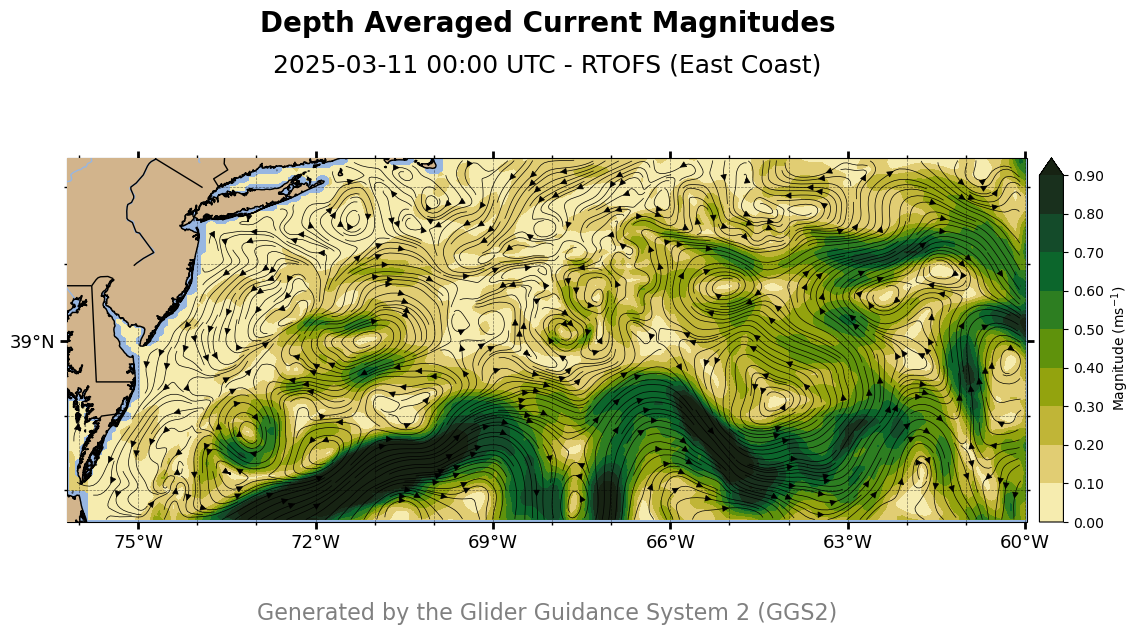

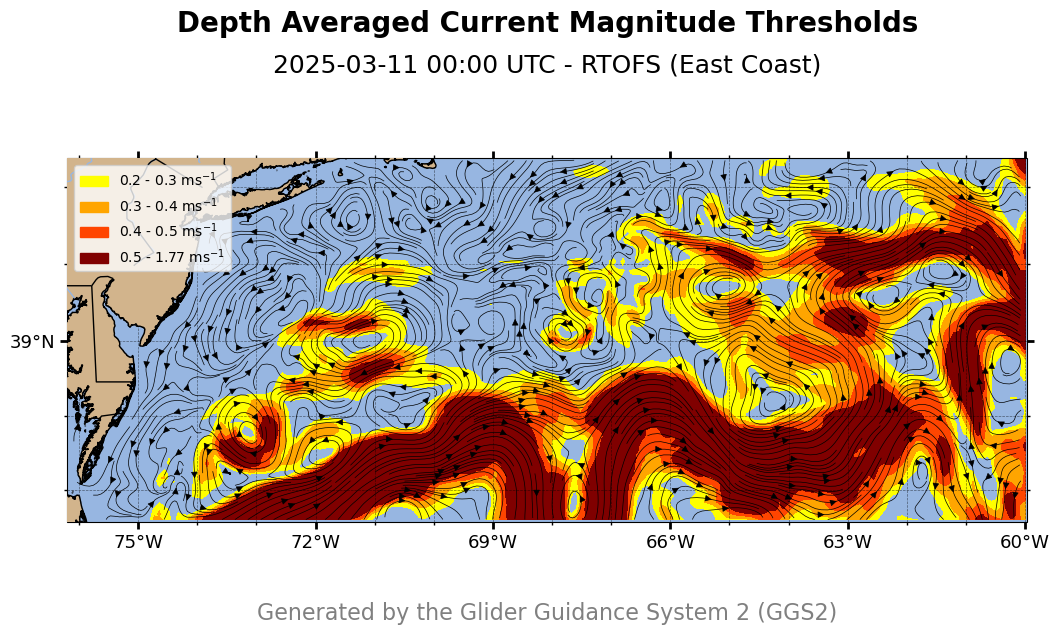

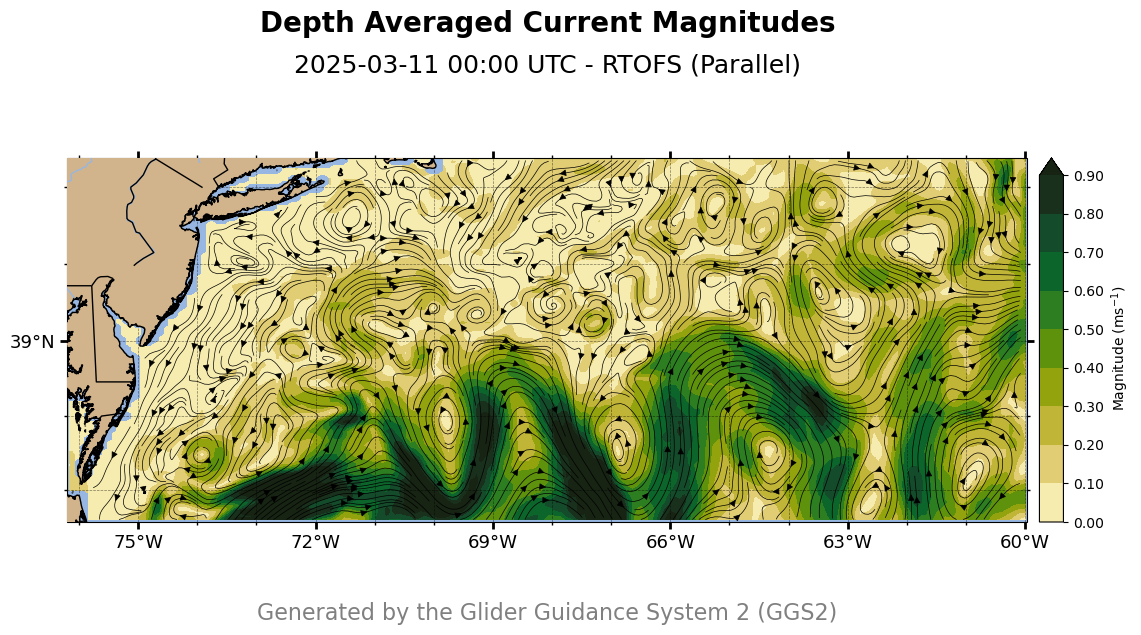

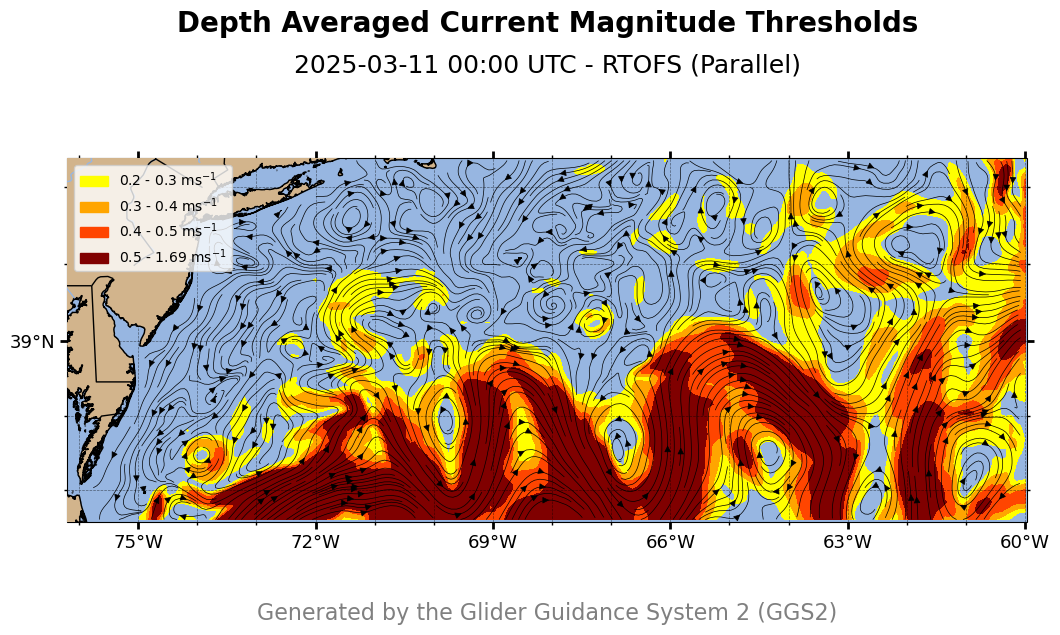

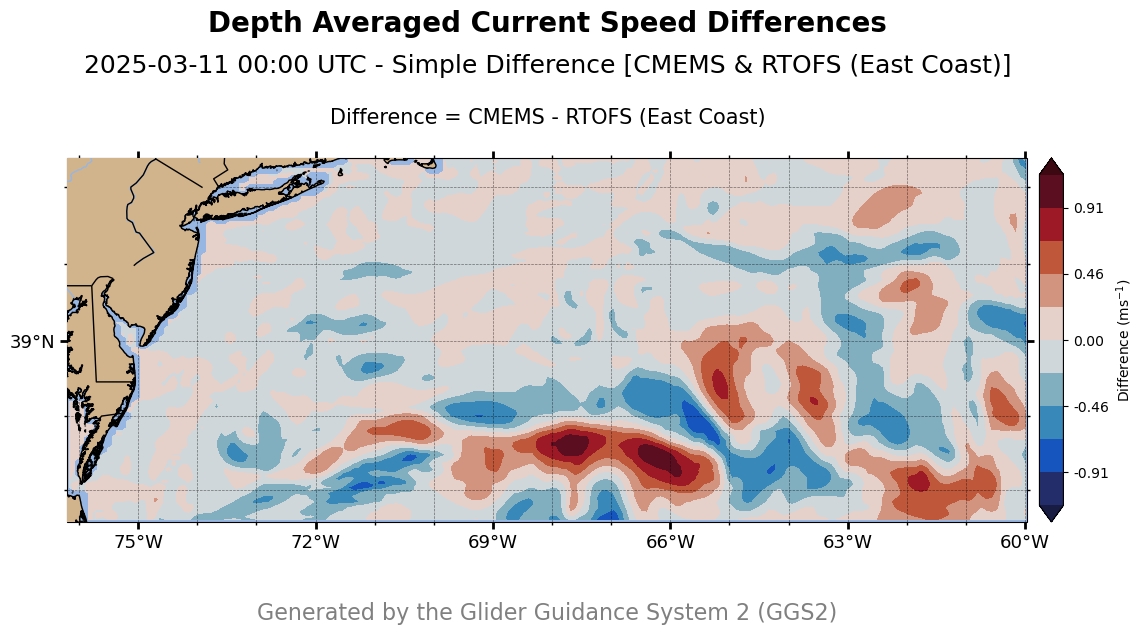

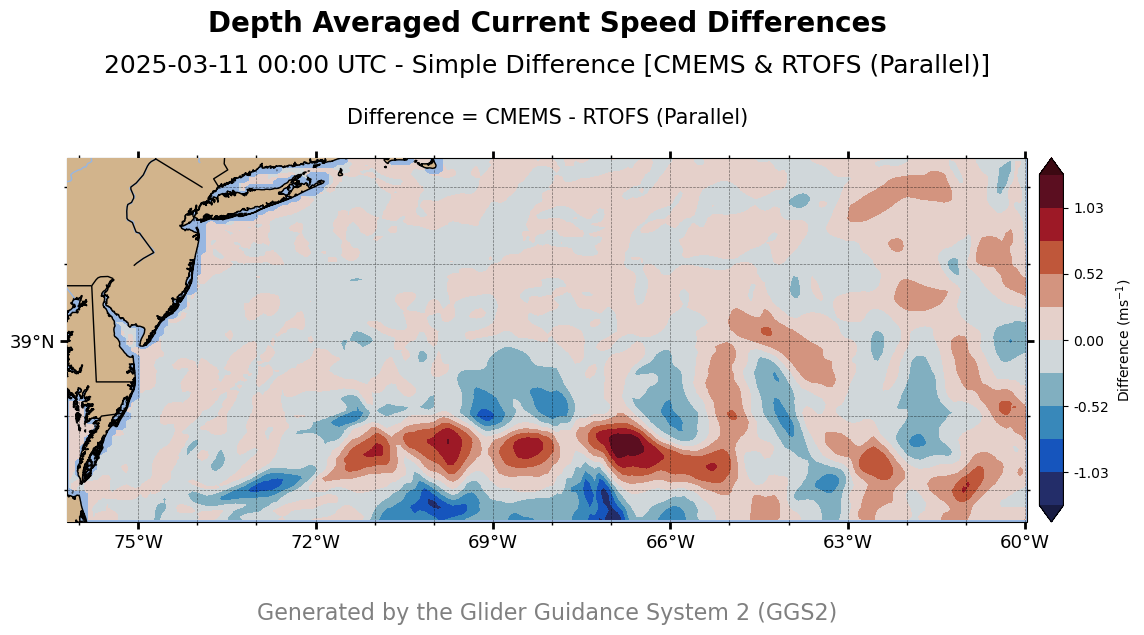

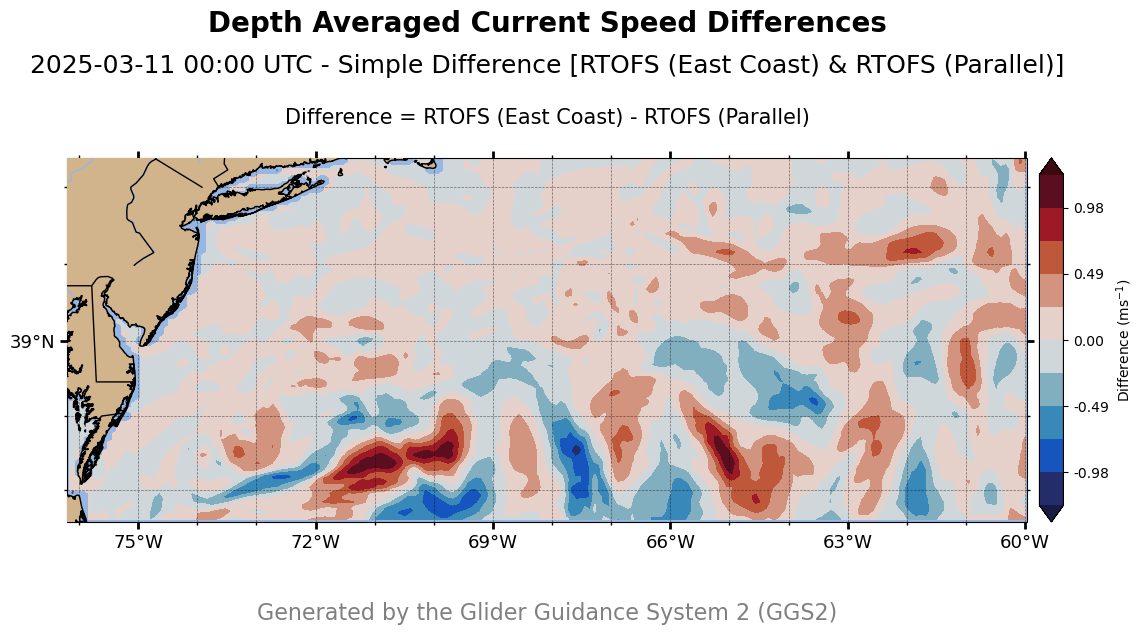

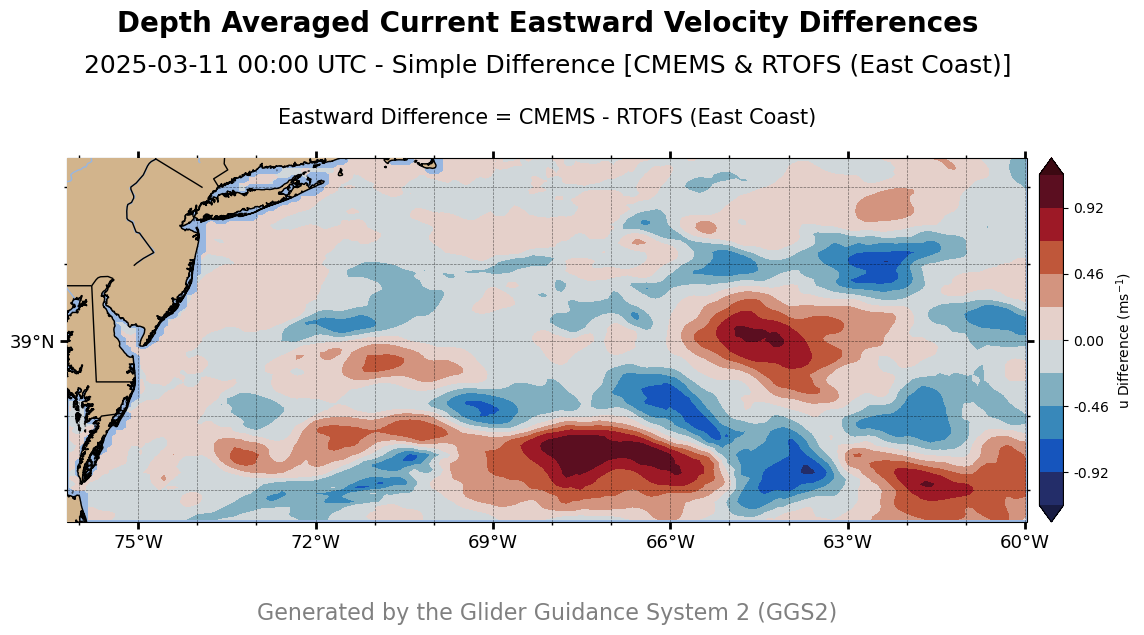

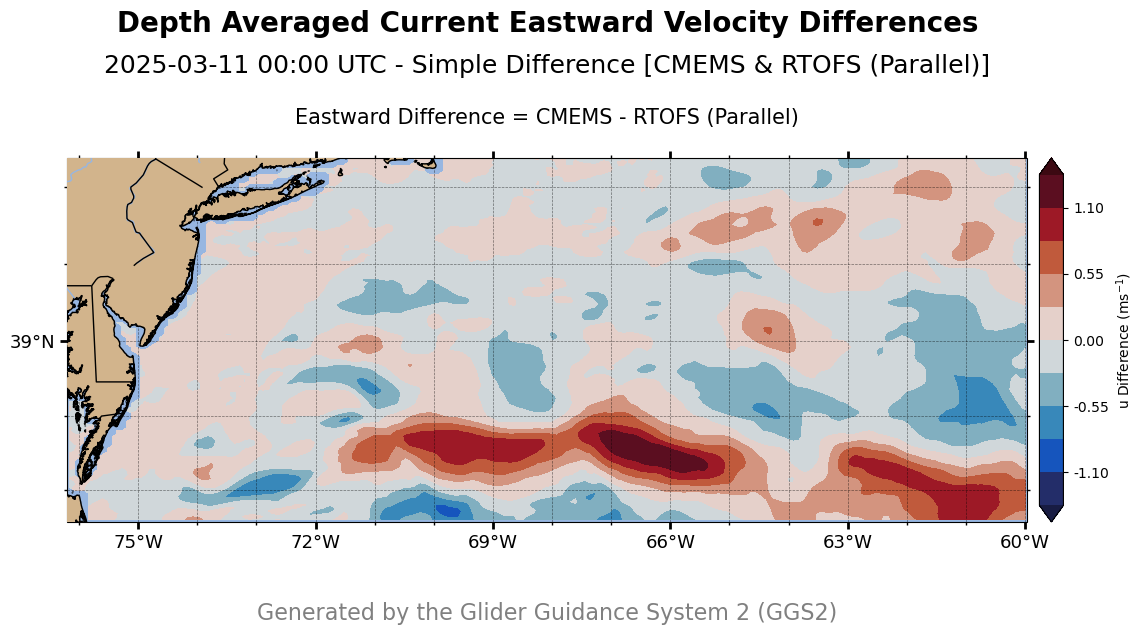

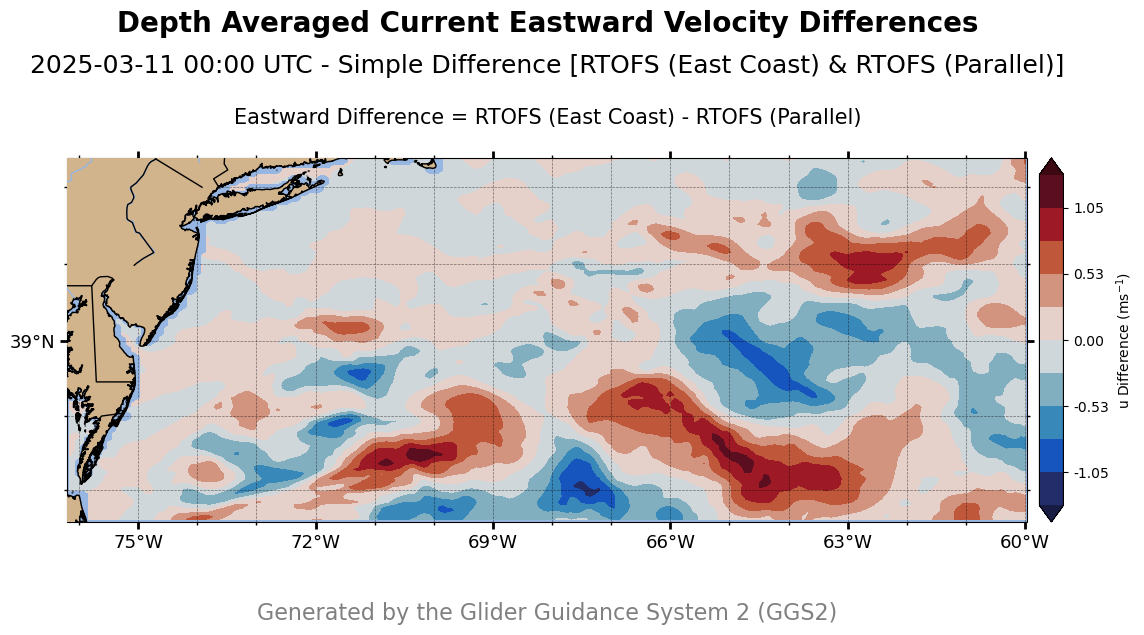

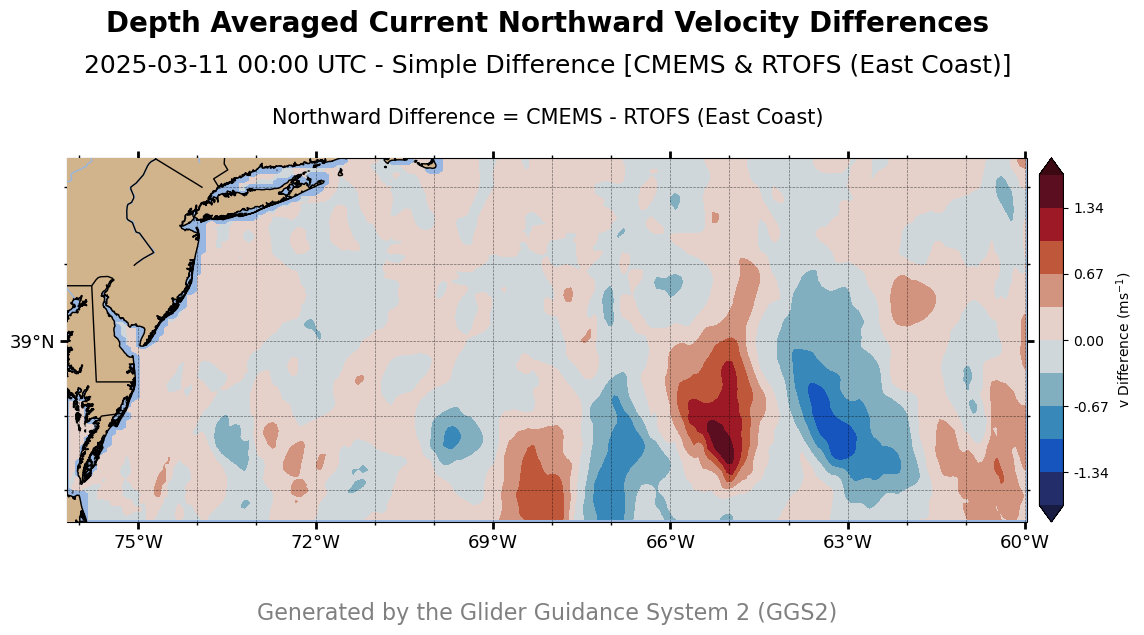

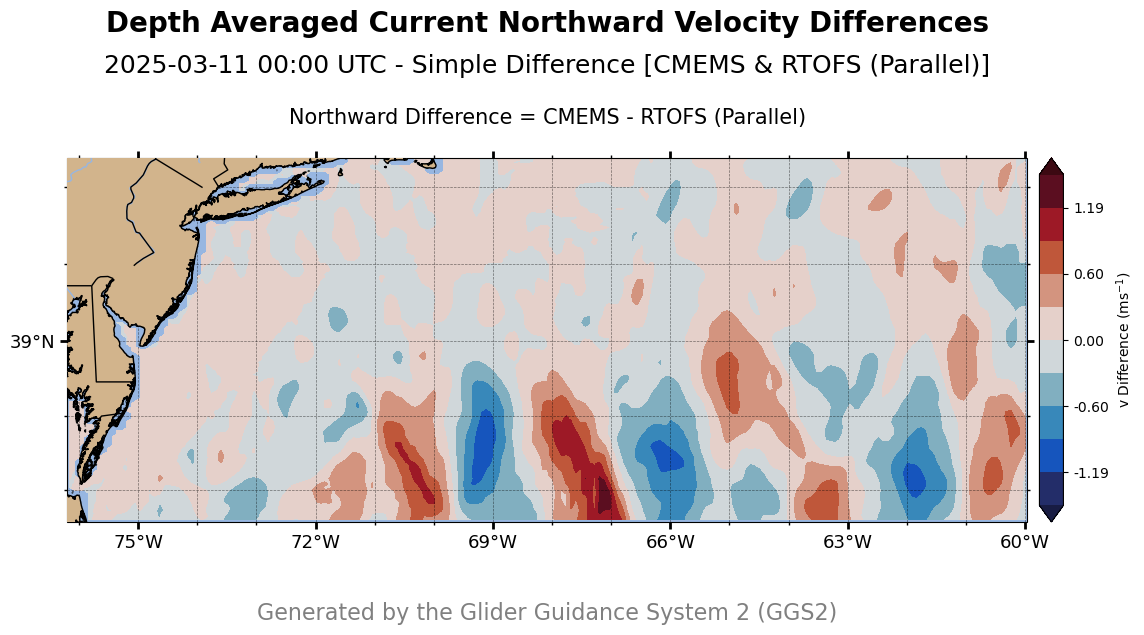

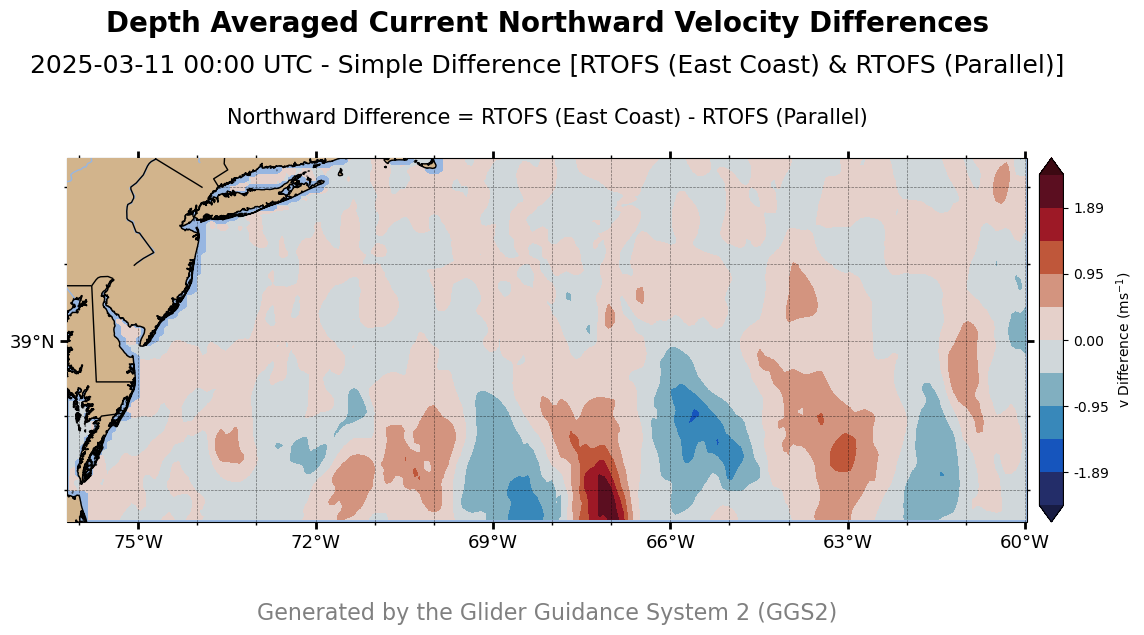

<Figure size 640x480 with 0 Axes>

In [4]:
%run main.py --config_name $config_name